Selection bias is a classic statistical bias. There appears to be a particular effect due to the method we use to choose samples, when in fact that effect is caused entirely by our selection. 

Consider the following example: there is a hypothetical sport "stringball" where players need either speed or strength but not necessarily both (e.g. if you're just fast, you can be an attacker, and if you're just strong, you can be a defender). Red blobs and blue blobs both have speed and strength sampled from r.uniform(0, 1) so there's no inherent bias towards either red blobs or blue blobs being better at stringball.

However, there is a selection bias in the form of cultural differences. A blob who scores 0.8 in either speed or strength is good enough to go pro, but of all the blobs which are good enough to go pro, red blobs have a 90% chance of being culturally encouraged to actually go pro, while only 10% of blue blobs do. If a blob is good enough to go pro and is culturally encouraged to go pro, then they go pro. 

We will run a simulation and track the 100 best pro players in a "Hall of Fame". Someone looking at our "Hall of Fame" might think that red blobs are much better at stringball than blue blobs, even though there is no inherent advantage in being red over being blue.

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

In [2]:
numBlobs = 2500

def generateIndividual():
    skills = [r.uniform(0, 1) for c in range(2)]
    blobType = r.choice([0, 1]) #0 for red, 1 for blue
    goodEnough = 1 if max(skills) > 0.8 else 0 #Whether the blob could have gone pro, if encouraged
    actualPro = 1 if goodEnough and r.uniform(0,1) < 0.9 - (0.8 * blobType) else 0
    return([skills, blobType, goodEnough, actualPro])

#Population
population = [generateIndividual() for c in range(numBlobs)]

#Graph stuff
colors = ["Red", "Blue"]
markers = ["x", "*"]

Let's look at all the blobs together! We'll plot every blob according to their speed and strength. If they did not go pro they get an "x" and if they did they get a "*".

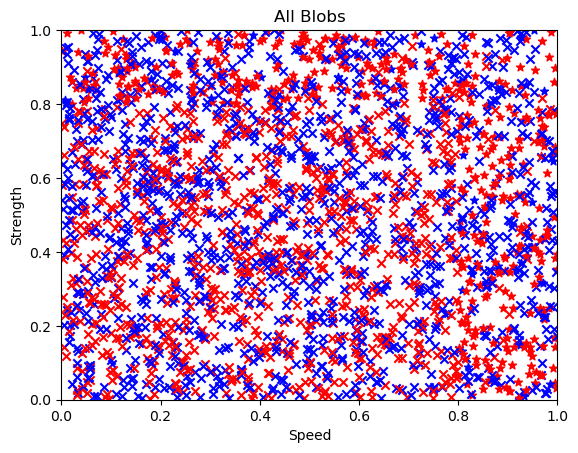

In [3]:
#All the blobs
for individual in population:
    plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[3]])
plt.title("All Blobs")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Now only the blobs who could have gone pro. We'll have one graph with all the blobs which could have gone pro, and another with just the blobs who had enough speed to go pro. The former shows all the data, and the latter is a bit neater and easier to inspect.

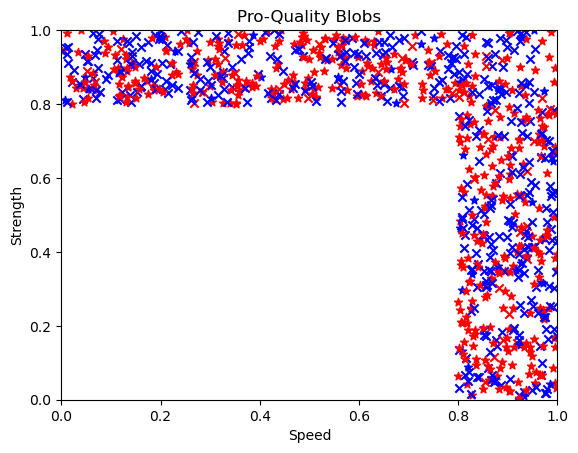

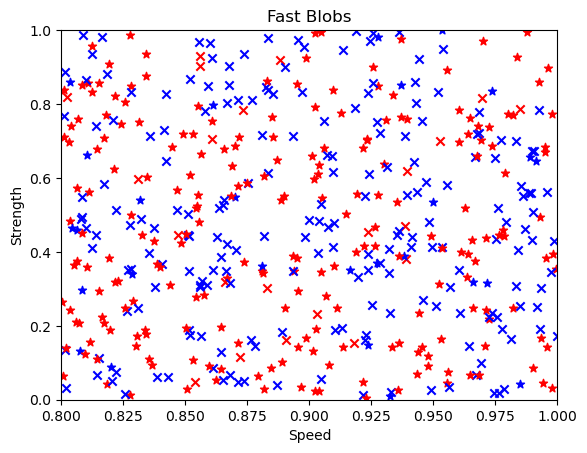

In [4]:
#Only the blobs which could have gone pro
for individual in population:
    if individual[2] == 1:
        plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[3]])
plt.title("Pro-Quality Blobs")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

#Only the blobs which could have gone pro from speed
for individual in population:
    if individual[2] == 1:
        plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[3]])
plt.title("Fast Blobs")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.xlim(0.8, 1)
plt.ylim(0, 1)
plt.show()

Now it's time for the stringball hall of fame! We need some way of collapsing "speed" and "strength" to a single "how good you are at stringball" variable, so for convenience that's just max(skills). For the hall of fame we don't care about players being "all rounders", they just have to be really good at one thing.

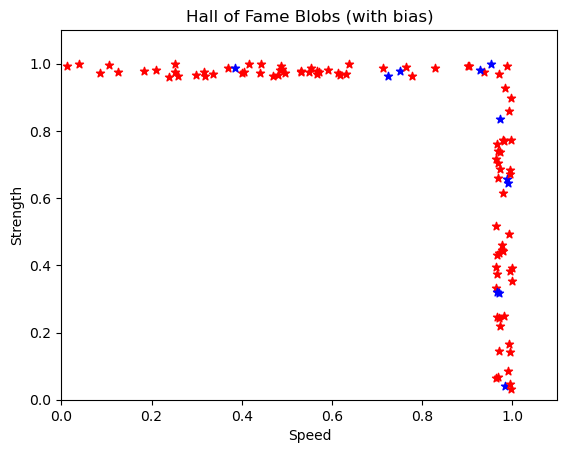

In [5]:
allProBlobs = [individual for individual in population if individual[3] == 1]
sortedProBlobs = sorted(allProBlobs, key = lambda ind: max(ind[0]))
hallOfFame = sortedProBlobs[-100:]

#All the blobs
for individual in hallOfFame:
    plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[3]])
plt.title("Hall of Fame Blobs (with bias)")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.show()

We have way more red blobs in the Hall of Fame than blue blobs, even though neither is inherently better or worse at stringball! What would have happened if we didn't apply the selection bias? If any blob good enough went pro with 100% certainty? Let's see!

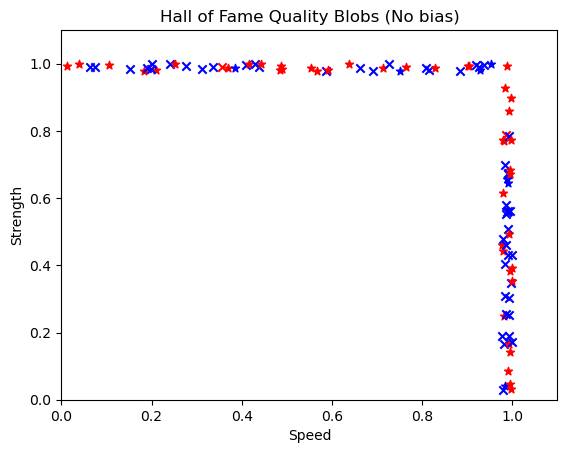

In [6]:
proQualityBlobs = [individual for individual in population if max(individual[0]) > 0.8]
sortedProQualityBlobs = sorted(proQualityBlobs, key = lambda ind: max(ind[0]))
hallOfFame = sortedProQualityBlobs[-100:]

#All the blobs
for individual in hallOfFame:
    plt.scatter(individual[0][0], individual[0][1], color = colors[individual[1]], marker = markers[individual[3]])
plt.title("Hall of Fame Quality Blobs (No bias)")
plt.xlabel("Speed")
plt.ylabel("Strength")
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.show()

Here the "x" players are players which could have been in the hall of fame if encouraged to go pro, but which didn't because they weren't encouraged. Notice how there are way more blue crosses than red ones!